In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from utils import PlotParams
plotter = PlotParams()
plotter.set_params()

In [2]:
RES_DIR = os.path.join(os.pardir, 'results_new')
SAVE_DIR = os.path.join(os.pardir, 'figs_new')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

### MNIST

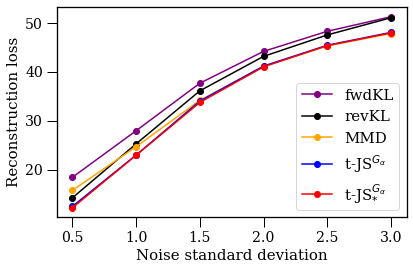

In [3]:
divs = ['fwdkl', 'kl', 'mmd', 'tGJS', 'tdGJS']
noise_levels = np.arange(0.5, 3.5, 0.5)
colors = ['purple', 'black', 'orange', 'blue', 'red']

for c, div in zip(colors, divs):
    recons = []
    for noise in noise_levels:
        sub_dir = os.path.join(RES_DIR, f'nmnist_{div}_n-{noise}')
        with open(os.path.join(sub_dir, 'test_eval.log')) as f:
            test_losses = json.load(f)
        recons.append(test_losses['recon_loss'])
    plt.plot(noise_levels, recons, marker='o', color=c, label=div)
plt.xlabel('Noise standard deviation')
plt.ylabel('Reconstruction loss')
plt.legend(['fwdKL', 'revKL', 'MMD', r't-JS$^{G_{\alpha}}$', r't-JS$^{G_{\alpha}}_{*}$'])

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'noise.pdf'))
plt.show()

### Alpha vs. dimension

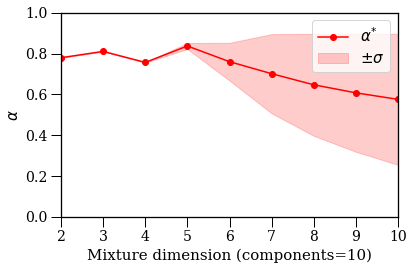

In [4]:
dimensions = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])#, 20])
alpha = np.array([0.7795884211858114,
                  0.8103969693183899,
                  0.7564303676287333,
                  0.836891770362854,
                  0.7601315180460612,
                  0.7013246615727743,
                  0.6470900376637777,
                  0.6075522402922312,
                  0.5757629623015722,])
                #   0.5001038834743667])
alpha_std = np.array([0.0009334862737097259,
                      0.0008858224103720795,
                      0.000872207153598875,
                      0.014723501971700952,
                      0.09233557576512995,
                      0.19397713122341784,
                      0.24979703177670154,
                      0.2884850020339191,
                      0.32049689124014813,])
                    #   0.40812106632205647])

plt.plot(dimensions, alpha, 'ro-', label=r'$\alpha^{*}$')
plt.fill_between(dimensions, alpha - alpha_std, alpha + alpha_std, color='r', alpha=0.2, label=r'$\pm\sigma$')
plt.xlim(2, 10)
plt.ylim(0, 1)
plt.xlabel('Mixture dimension (components=10)')
plt.ylabel(r'$\alpha$')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'synthetic_dims.pdf'))
plt.show()

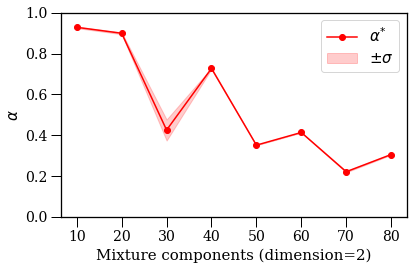

In [5]:
num_components = np.array([10, 20, 30, 40, 50, 60, 70, 80])
final_alpha = np.array([0.9283990065256754,
                        0.8992002805074056,
                        0.4254804750283559,
                        0.7270304163297018,
                        0.35139380892117816,
                        0.41351701815923053,
                        0.22128515442212424,
                        0.30542294184366864])
final_alpha_std = np.array([0.0039166540809634715,
                            0.004510127032970674,
                            0.051649325992236504,
                            0.0029872732435997852,
                            0.0005944468259420489,
                            0.0010235160646949071,
                            0.003147510488774904,
                            0.0016965897527882363])

plt.plot(num_components, final_alpha, 'ro-', label=r'$\alpha^{*}$')
plt.fill_between(num_components, final_alpha - final_alpha_std, final_alpha + final_alpha_std, color='r', alpha=0.2, label=r'$\pm\sigma$')
# plt.xlim(0, 20)
plt.ylim(0, 1)
plt.xlabel('Mixture components (dimension=2)')
plt.ylabel(r'$\alpha$')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'synthetic_components.pdf'))
plt.show()

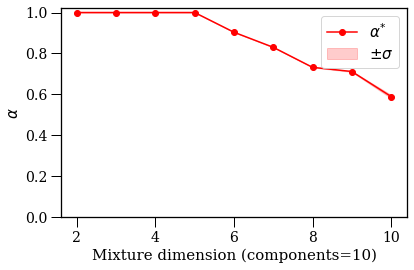

In [6]:
dimensions = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
alpha = np.array([1.0,
 1.0,
 1.0,
 1.0,
 0.9036281307538351,
 0.8298924167950948,
 0.7319001952807108,
 0.7113890250523885,
 0.5890831351280212])
alpha_std = np.array([0.0,
 0.0,
 0.0,
 0.0,
 1.652044161785498e-05,
 0.0005306675230909025,
 0.00040885170005725745,
 0.0021385579575752245,
 0.008162617683410645])

plt.plot(dimensions, alpha, 'ro-', label=r'$\alpha^{*}$')
plt.fill_between(dimensions, alpha - alpha_std, alpha + alpha_std, color='r', alpha=0.2, label=r'$\pm\sigma$')
# plt.xlim(2, 10)
plt.ylim(bottom=0)
plt.xlabel('Mixture dimension (components=10)')
plt.ylabel(r'$\alpha$')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'synthetic_dims-components.pdf'))
plt.show()

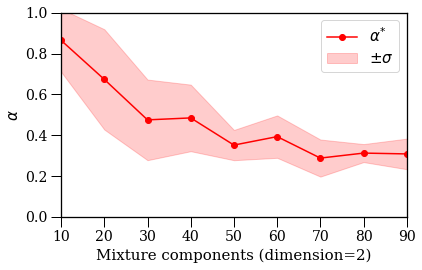

In [11]:
num_components = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
final_alpha = np.array([0.8646732696465084,
 0.6734855208132002,
 0.47519099499498096,
 0.48476516627348387,
 0.3517251148819923,
 0.3931678739087335,
 0.2880856970260883,
 0.3125299687186877,
 0.3084730331240029])
final_alpha_std = np.array([0.1540748680186445,
 0.2455868101918837,
 0.19736508871690586,
 0.16301355919735114,
 0.07409818320253624,
 0.10378574667639984,
 0.09084584710809297,
 0.04410420248473864,
 0.07490443657023696])

plt.plot(num_components, final_alpha, 'ro-', label=r'$\alpha^{*}$')
plt.fill_between(num_components, final_alpha - final_alpha_std, final_alpha + final_alpha_std, color='r', alpha=0.2, label=r'$\pm\sigma$')
plt.xlim(10, 90)
plt.ylim(0, 1)
plt.xlabel('Mixture components (dimension=2)')
plt.ylabel(r'$\alpha$')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'synthetic_components.pdf'))
plt.show()